# Bitcoin transactional data analysis (EDA)

##### Importing libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Meeting the data

In [2]:
df = pd.read_csv('BTC_DATA.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4389 entries, 0 to 4388
Columns: 738 entries, Unnamed: 0 to price90rocUSD
dtypes: float64(690), int64(47), object(1)
memory usage: 24.7+ MB


In [3]:
df.shape

(4389, 738)

In [4]:
df.isnull().values.any()

False

##### To simplify lets work with just some cool and important columns

In [5]:
list(df)

['Unnamed: 0',
 'Date',
 'priceUSD',
 'transactions',
 'size',
 'sentbyaddress',
 'difficulty',
 'hashrate',
 'mining_profitability',
 'sentinusdUSD',
 'transactionfeesUSD',
 'median_transaction_feeUSD',
 'confirmationtime',
 'transactionvalueUSD',
 'mediantransactionvalueUSD',
 'activeaddresses',
 'top100cap',
 'fee_to_rewardUSD',
 'transactions3sma',
 'transactions7sma',
 'transactions14sma',
 'transactions30sma',
 'transactions90sma',
 'transactions3ema',
 'transactions7ema',
 'transactions14ema',
 'transactions30ema',
 'transactions90ema',
 'transactions3wma',
 'transactions7wma',
 'transactions14wma',
 'transactions30wma',
 'transactions90wma',
 'transactions3trx',
 'transactions7trx',
 'transactions14trx',
 'transactions30trx',
 'transactions90trx',
 'transactions3mom',
 'transactions7mom',
 'transactions14mom',
 'transactions30mom',
 'transactions90mom',
 'transactions3std',
 'transactions7std',
 'transactions14std',
 'transactions30std',
 'transactions90std',
 'transactions3var

In [6]:
df.head(1)

,Unnamed: 0,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,0,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2612.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
cols_to_keep = ['Date', 'priceUSD', 'transactions', 'size', 'difficulty', 'hashrate',\
'mining_profitability', 'confirmationtime']

In [8]:
df.drop(df.columns.difference(cols_to_keep), axis=1, inplace=True)

In [9]:
df

,Date,priceUSD,transactions,size,difficulty,hashrate,mining_profitability,confirmationtime
0,2010/07/18,0.0726,248,765.285,1.815430e+02,1.554461e+09,401834.0000,8.372
1,2010/07/19,0.0859,354,756.040,1.815430e+02,1.551287e+09,481473.0000,8.276
2,2010/07/20,0.0783,413,984.707,1.815430e+02,1.640430e+09,431831.0000,7.956
3,2010/07/21,0.0767,256,542.483,1.815430e+02,1.723493e+09,460783.0000,6.957
4,2010/07/22,0.0649,221,491.903,1.815430e+02,1.705481e+09,334641.0000,8.182
...,...,...,...,...,...,...,...,...
4384,2022/07/19,22514.0000,279812,746068.000,2.915280e+13,1.891411e+20,0.1060,10.435
4385,2022/07/20,23568.0000,260069,717017.000,2.915280e+13,1.924968e+20,0.0996,11.429
4386,2022/07/21,22936.0000,273837,719470.000,2.882714e+13,1.910321e+20,0.1070,10.360
4387,2022/07/22,23145.0000,263144,661528.000,2.769257e+13,1.889912e+20,0.1040,10.909


In [10]:
df.isnull().sum()

Date                    0
priceUSD                0
transactions            0
size                    0
difficulty              0
hashrate                0
mining_profitability    0
confirmationtime        0
dtype: int64

In [11]:
df.isna().sum()

Date                    0
priceUSD                0
transactions            0
size                    0
difficulty              0
hashrate                0
mining_profitability    0
confirmationtime        0
dtype: int64

### Let's visualize the most classical graph: The BTC's price growth

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

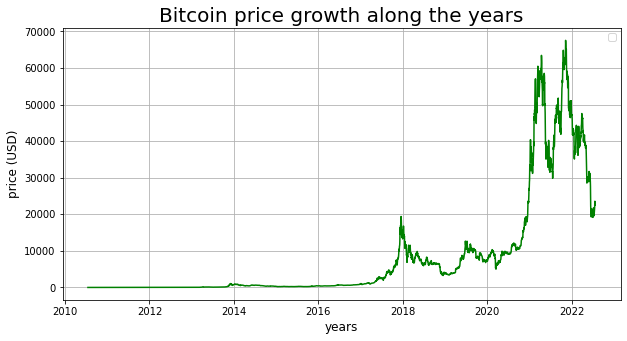

In [13]:
plt.figure(figsize=(10,5))

plt.plot(df.Date, df.priceUSD, marker='', color='green')

plt.title('Bitcoin price growth along the years', color='black', size=20)
plt.ylabel('price (USD)', size=12)
plt.xlabel('years', size=12)
plt.grid(True)
plt.legend('')
plt.show()

### Transactions and their size along the time

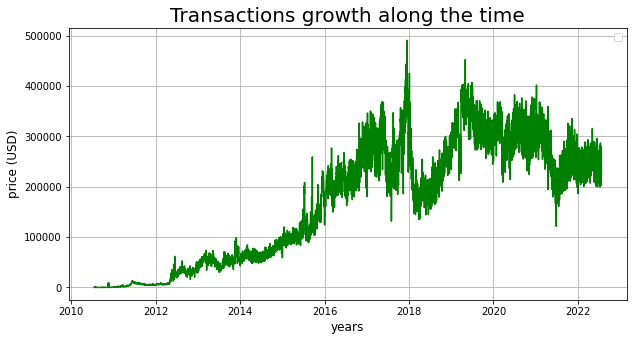

In [14]:
plt.figure(figsize=(10,5))

plt.plot(df.Date, df.transactions, marker='', color='green')
plt.title('Transactions growth along the time', color='black', size=20)
plt.ylabel('price (USD)', size=12)
plt.xlabel('years', size=12)
plt.grid(True)
plt.legend('')
plt.show()

### Difficulty of mining BTC along the time

#### The difficulty of mining depends specially of 'halving'. Halving is an automatic update that
#### decrease in 50% the reward of block (from block chain) mined due to the doubled difficult of
#### proof of work (mathematical calculation to proof that you're validating the transaction)

#### It's also influenciable by the how mutch miners (hashrate) the network have.
#### In 2021 the China started a sequence of prohibitions and we can see it on mining difficult/hash rate

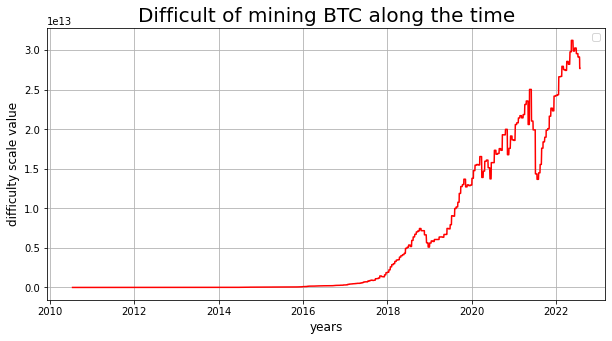

In [15]:
plt.figure(figsize=(10,5))

plt.plot(df.Date, df.difficulty, marker='', color='red')
plt.title('Difficult of mining BTC along the time', color='black', size=20)
plt.ylabel('difficulty scale value', size=12)
plt.xlabel('years', size=12)
plt.grid(True)
plt.legend('')
plt.show()

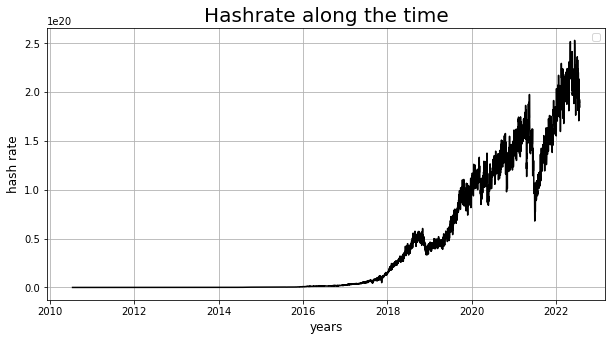

In [16]:
plt.figure(figsize=(10,5))

plt.plot(df.Date, df.hashrate, marker='', color='black')
plt.title('Hashrate along the time', color='black', size=20)
plt.ylabel('hash rate', size=12)
plt.xlabel('years', size=12)
plt.grid(True)
plt.legend('')
plt.show()

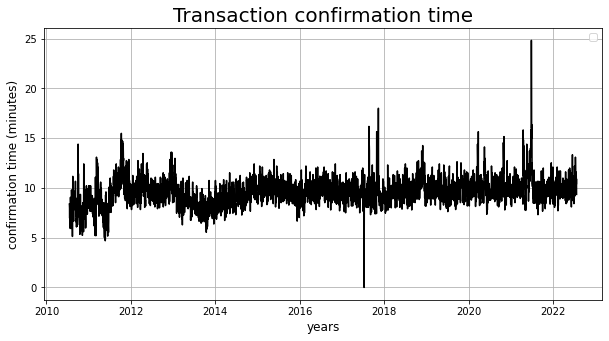

In [17]:
# it's possible to see a peak in 2021 also due to China prohibitions

plt.figure(figsize=(10,5))

plt.plot(df.Date, df.confirmationtime, marker='', color='black')
plt.title('Transaction confirmation time', color='black', size=20)
plt.ylabel('confirmation time (minutes)', size=12)
plt.xlabel('years', size=12)
plt.grid(True)
plt.legend('')
plt.show()

#### The heatmap explain very well some correlations.
#### Price and hashrate have a high correlation because If hashrate goes down, this might indicate 
#### bearishness on the part of miners or weakness in the market causing downward pressure on the price.

<AxesSubplot:title={'center':'Correlation Heatmap'}>

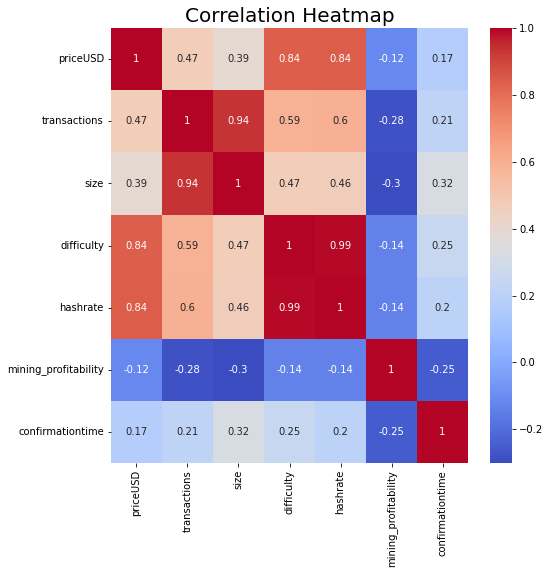

In [25]:
plt.figure(figsize=(8,8))
plt.title('Correlation Heatmap', color='black', size=20)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')